In [232]:
import pandas as pd

importing tha dataset

In [233]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [234]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [236]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

We can see here are some nan values of some col

In [237]:
df.dropna(inplace=True)

In [238]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [239]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0


In [240]:
## handling size columns
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [241]:
df['size'] = df['size'].str.split(" ").str[0].astype(int)

In [242]:
df['size'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [243]:
# handling availibility column
df.availability.value_counts()

Ready To Move    5709
18-Dec            180
18-May            171
19-Dec            157
18-Apr            148
                 ... 
20-Feb              1
15-Jun              1
20-Mar              1
16-Mar              1
14-Jul              1
Name: availability, Length: 74, dtype: int64

In [244]:
df['availability'] = df['availability'].str.replace('Ready To Move', "13-Aug")

In [245]:
df['avail_month'] = df['availability'].str.split("-").str[1]

In [246]:
df.drop("availability", axis = 1, inplace = True)

In [247]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,avail_month
0,Super built-up Area,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07,Dec
1,Plot Area,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00,Aug
3,Super built-up Area,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00,Aug
5,Super built-up Area,Whitefield,2,DuenaTa,1170,2.0,1.0,38.00,Aug
11,Plot Area,Whitefield,4,Prrry M,2785,5.0,3.0,295.00,Aug


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area_type    7496 non-null   object 
 1   location     7496 non-null   object 
 2   size         7496 non-null   int64  
 3   society      7496 non-null   object 
 4   total_sqft   7496 non-null   object 
 5   bath         7496 non-null   float64
 6   balcony      7496 non-null   float64
 7   price        7496 non-null   float64
 8   avail_month  7496 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 585.6+ KB


In [249]:
# fixing string values in total_sqft and its datatype

In [250]:
# Function to preprocess 'total_sqft' values
def preprocess_sqft(sqft_value):
    try:
        if '-' in sqft_value:  # Handle range values
            parts = sqft_value.split('-')
            lower = float(parts[0].strip())
            upper = float(parts[1].strip())
            return (lower + upper) / 2
        else:
            return float(sqft_value)
    except (ValueError, AttributeError):
        return None  # Handle non-convertible values

# Apply the preprocessing function to 'total_sqft' column
df['total_sqft'] = df['total_sqft'].apply(preprocess_sqft)

# Filter out rows with non-numeric values
df_filtered = df[df['total_sqft'].notnull()]

In [251]:
df.dropna(inplace = True)


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7481 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area_type    7481 non-null   object 
 1   location     7481 non-null   object 
 2   size         7481 non-null   int64  
 3   society      7481 non-null   object 
 4   total_sqft   7481 non-null   float64
 5   bath         7481 non-null   float64
 6   balcony      7481 non-null   float64
 7   price        7481 non-null   float64
 8   avail_month  7481 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 584.5+ KB


In [253]:
# seprating the featurs

numarical_featurs = [feature for feature in df.columns if  df[feature].dtype != "object"]
categorical_featurs = [feature for feature in df.columns if  df[feature].dtype == "object"]

print("Categorial Features", categorical_featurs)
print("Numarical Features", numarical_featurs)


Categorial Features ['area_type', 'location', 'society', 'avail_month']
Numarical Features ['size', 'total_sqft', 'bath', 'balcony', 'price']


In [254]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [255]:
encoder = LabelEncoder()

In [256]:
df['area_type'] = encoder.fit_transform(df[['area_type']])
df['society'] = encoder.fit_transform(df[['society']])
df['location'] = encoder.fit_transform(df[['location']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [257]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,avail_month
0,3,209,2,441,1056.0,2.0,1.0,39.07,Dec
1,2,148,4,2351,2600.0,5.0,3.0,120.00,Aug
3,3,386,3,2107,1521.0,3.0,1.0,95.00,Aug
5,3,624,2,583,1170.0,2.0,1.0,38.00,Aug
11,2,624,4,1564,2785.0,5.0,3.0,295.00,Aug


In [258]:
df['avail_month'].unique()

array(['Dec', 'Aug', 'Nov', 'Oct', 'Sep', 'Mar', 'Apr', 'Jan', 'Jul',
       'May', 'Jun', 'Feb'], dtype=object)

In [259]:
o_encoder = OrdinalEncoder(categories = [['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])

In [260]:
df['avail_month'] = o_encoder.fit_transform(df[['avail_month']])

In [261]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,avail_month
0,3,209,2,441,1056.0,2.0,1.0,39.07,11.0
1,2,148,4,2351,2600.0,5.0,3.0,120.00,7.0
3,3,386,3,2107,1521.0,3.0,1.0,95.00,7.0
5,3,624,2,583,1170.0,2.0,1.0,38.00,7.0
11,2,624,4,1564,2785.0,5.0,3.0,295.00,7.0


In [262]:
df['avail_month'] = df['avail_month'].astype(int)
df['area_type'] = (df['area_type']).astype(int)
df['society'] = (df['society']).astype(int)
df['location'] = (df['location']).astype(int)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7481 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area_type    7481 non-null   int64  
 1   location     7481 non-null   int64  
 2   size         7481 non-null   int64  
 3   society      7481 non-null   int64  
 4   total_sqft   7481 non-null   float64
 5   bath         7481 non-null   float64
 6   balcony      7481 non-null   float64
 7   price        7481 non-null   float64
 8   avail_month  7481 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 584.5 KB


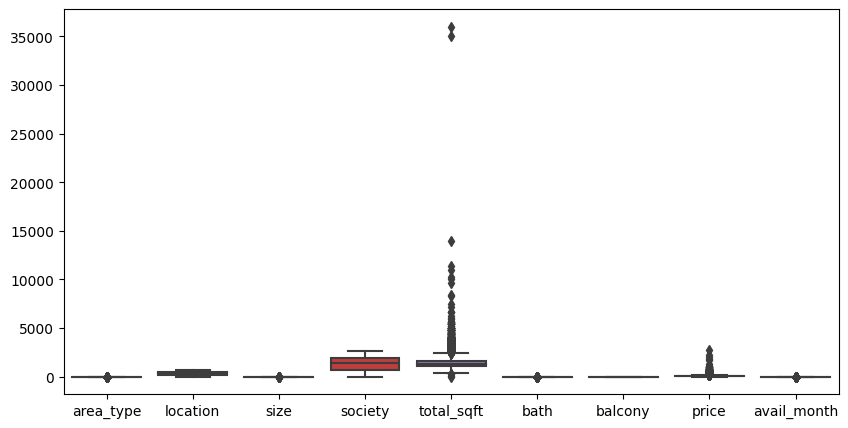

In [283]:
# visualizing the outliars
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
sns.boxplot(data=df);

data set contains some sort of outliers in a feature called total_sqft

## Model Training

In [265]:
# dividing the dataset
x = df.drop("price", axis = 1)
y = df["price"]

In [266]:
x.head()

,area_type,location,size,society,total_sqft,bath,balcony,avail_month
0,3,209,2,441,1056.0,2.0,1.0,11
1,2,148,4,2351,2600.0,5.0,3.0,7
3,3,386,3,2107,1521.0,3.0,1.0,7
5,3,624,2,583,1170.0,2.0,1.0,7
11,2,624,4,1564,2785.0,5.0,3.0,7


In [267]:
y

0         39.07
1        120.00
3         95.00
5         38.00
11       295.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13318    488.00
Name: price, Length: 7481, dtype: float64

In [268]:
# splitting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [269]:
x_train.shape , x_test.shape

((5610, 8), (1871, 8))

In [270]:
y_train.shape, y_test.shape

((5610,), (1871,))

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [272]:
# model traning

from sklearn.svm import SVR

svr = SVR()

svr.fit(x_train_scaled, y_train)

SVR()

In [273]:
# Use the trained classifier to predict labels for the testing data
y_pred = svr.predict(x_test_scaled)
y_pred

array([ 88.53605801,  67.00509898, 168.50860176, ...,  49.69124031,
        92.37777137,  66.24718295])

In [274]:
from math import sqrt
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)
adjusted_r_squared = 1 - (1 - r2_scode) * (len(y_test)- 1) / (len(y_test) - x_test.shape[1] - 1)

print('mse:', mse)
print('mae:', mae)
print('rmse:', sqrt(mse))
print('r_square:', r2_score)
print('adjusted_r_squared:', adjusted_r_squared)

mse: 8195.711397870273
mae: 32.09572243280244
rmse: 90.53016844052745
r_square: -5.660225727681349
adjusted_r_squared: -5.688841090635941


In [278]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=10)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.4984007917396768


In [279]:
tuned_svc = SVR(**best_params)

In [280]:
tuned_svc.fit(x_train_scaled, y_train)

SVR(C=10, epsilon=0.3)

In [281]:
y_pred = tuned_svc.predict(x_test_scaled)
y_pred

array([ 76.76674905,  69.42156901, 328.59806221, ...,  52.76952865,
       120.00177679,  60.40122218])

In [282]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)
adjusted_r_squared = 1 - (1 - r2_score) * (len(y_test)- 1) / (len(y_test) - x_test.shape[1] - 1)

print('mse:', mse)
print('mae:', mae)
print('rmse:', sqrt(mse))
print('r_square:', r2_score)
print('adjusted_r_squared:', adjusted_r_squared)

mse: 6191.77408336481
mae: 26.25994754528695
rmse: 78.68782678003511
r_square: -0.9194180158322836
adjusted_r_squared: -0.9276647097778572


### Q1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

Answer -->  Since our final dataset total_sqft feature contains some outlires which can effect out model the most suitable regression metric to employ is the Mean Squared Error (MSE) becouse it is robust to outliers.

#### Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

Answer-->  In the context of predicting house prices, minimizing the MSE is aligned with the goal of making predictions that are as close as possible to the true house prices.

On the other hand, R-squared (R2) provide insight into how well your model explains the variance in house prices, it doesn't necessarily reflect the accuracy of individual price predictions. R2 can be useful for understanding the overall goodness of fit of the model, but it might not be the most informative metric when your primary focus is on predicting individual house prices with high accuracy.

### Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

Answer-->  When dealing with a dataset that has a significant number of outliers, the most appropriate regression metric to use with your SVM model would be the Mean Absolute Error (MAE).

## Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

Answer--> When we have built an SVM regression model using a polynomial kernel and found that both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values are very close, either metric could be suitable for evaluating the performance of your model. Both metrics provide similar insights into the accuracy of your predictions.

### Q5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

Answer-->
When comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and your goal is to measure how well the model explains the variance in the target variable, the most appropriate evaluation metric to use would be the R-squared (R2).

R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features). It ranges from 0 to 1